In [1]:
import data_analysis_funcs as daf
import matplotlib.pyplot as plt

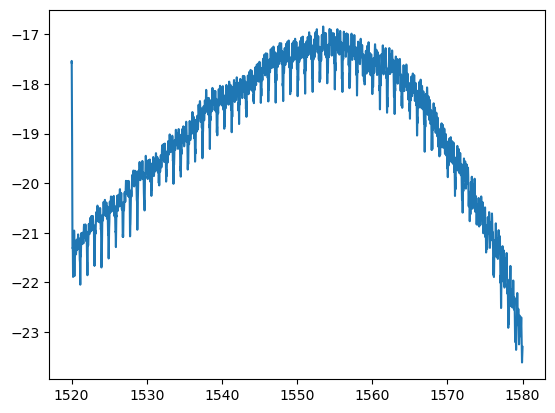

In [2]:
data_analyse_file="sg_rr_100_025 2023-12-11 14-23-14.csv"
wvlen_array,pow_array=daf.get_wavlen_and_pow_arrays(data_analyse_file)
daf.plot_visualise(wvlen_array,pow_array, full_range=True)

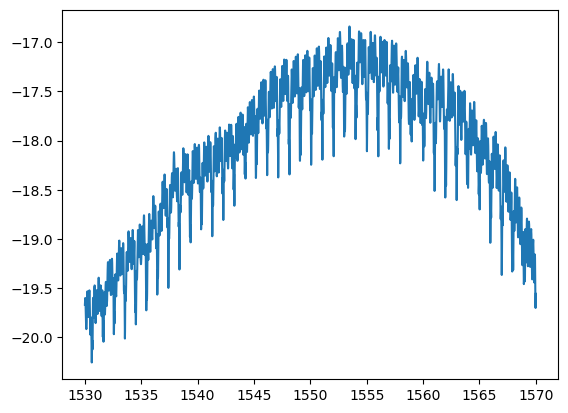

1530.0
1570.0


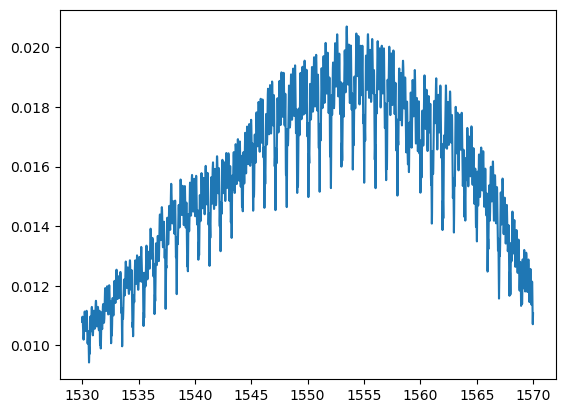

[0.01079174 0.01088217 0.01090428 ... 0.01071035 0.01086609 0.01107108]


In [3]:
start_point_index=1000
end_point_index=5001
daf.plot_visualise(wvlen_array,pow_array,full_range=False,start_index=start_point_index,stop_index=end_point_index)
wvlen_peak_search=wvlen_array[start_point_index:end_point_index] #selects wavelengths to search through
power_peak_search_dBm=pow_array[start_point_index:end_point_index] # selects powers to search though
power_peak_search=daf.vector_dBm_to_mW(power_peak_search_dBm) #converts powers to mW
print(wvlen_peak_search[0])
print(wvlen_peak_search[-1])
plt.plot(wvlen_peak_search,power_peak_search)
plt.show()
print(power_peak_search)

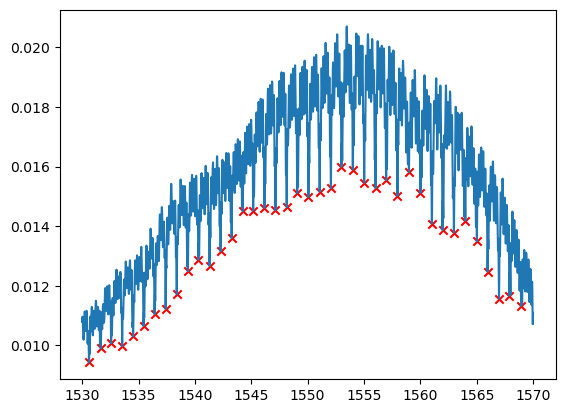

40
[1530.61, 1531.65, 1532.57, 1533.55, 1534.52, 1535.45, 1536.42, 1537.41, 1538.39, 1539.38, 1540.31, 1541.3, 1542.28, 1543.26, 1544.25, 1545.17, 1546.17, 1547.15, 1548.15, 1549.08, 1550.07, 1551.07, 1552.07, 1553.0, 1554.01, 1555.02, 1556.03, 1556.97, 1557.97, 1558.99, 1560.01, 1561.02, 1561.97, 1562.98, 1563.99, 1565.02, 1565.96, 1566.98, 1567.91, 1568.94]


In [5]:
wvlen_step_size=0.01
approx_fsr=1
promin_use=0.0015
dist_use=(approx_fsr/2)/wvlen_step_size
#dist_use=1
peak_locs,n_peaks,peak_wavelens,peak_powers=daf.give_peak_locs(wvlen_step_size,approx_fsr,promin_use,dist_use,wvlen_peak_search,power_peak_search)
plt.plot(wvlen_peak_search,power_peak_search)
plt.scatter(peak_wavelens,peak_powers,color="red", marker="x")
plt.show()
print(n_peaks)#just added for check
print(peak_wavelens)#check

In [6]:
fsr_values=daf.calc_fsrs(peak_wavelens)
fsr_mean,fsr_error=daf.fsr_avg_and_error(fsr_values)
print(fsr_values)
print(fsr_mean)
print(fsr_error)

[1.04 0.92 0.98 0.97 0.93 0.97 0.99 0.98 0.99 0.93 0.99 0.98 0.98 0.99
 0.92 1.   0.98 1.   0.93 0.99 1.   1.   0.93 1.01 1.01 1.01 0.94 1.
 1.02 1.02 1.01 0.95 1.01 1.01 1.03 0.94 1.02 0.93 1.03]
0.9828205128205167
0.0055097596875867206


Now to calculate peak widths below:

[0.13144085 0.12409265 0.12971789 0.15637523 0.14431106 0.13975582
 0.13390877 0.12547421 0.1468852  0.13788451 0.14237388 0.1388406
 0.14322309 0.13098535 0.13437624 0.13750339 0.15028662 0.2132719
 0.13541256 0.14962084 0.15469068 0.15468227 0.14014479 0.154639
 0.15717115 0.21455639 0.14195091 0.15084999 0.1383238  0.18187035
 0.25335462 0.14025772 0.15956037 0.22429586 0.1620724  0.14594671
 0.14338444 0.22407573 0.16222035 0.15325729]


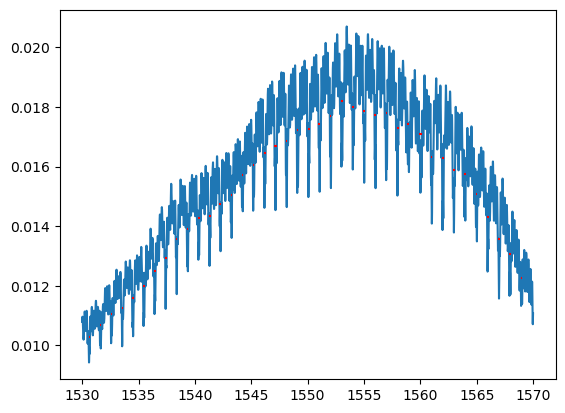

In [7]:
peak_width_data=daf.get_peak_FWHM(wvlen_step_size,approx_fsr,promin_use,dist_use,wvlen_peak_search,power_peak_search)
peak_widths=peak_width_data[0]
print(peak_widths)
peak_width_heights=peak_width_data[1]
peak_width_lefts=peak_width_data[2]
peak_width_rights=peak_width_data[3]
daf.plot_lines_FWHM(peak_width_heights,peak_width_lefts,peak_width_rights,wvlen_peak_search,power_peak_search)


Now calculating mean and standard error on FWHM using same func as for fsr:

In [8]:
mean_FWHM,FWHM_error=daf.fsr_avg_and_error(peak_widths)
print(mean_FWHM)
print(FWHM_error)

0.15507613665588948
0.00471213210706593


Now to to calculate Q factor, and its error, and Q^3/R^2, and its error.

In [9]:
Q_factor_list=peak_wavelens/peak_widths
mean_Q_factor,Q_factor_error=daf.fsr_avg_and_error(Q_factor_list)
print(mean_Q_factor)
print(Q_factor_error)


10269.38106850505
236.72287624766068


In [10]:
radius=100
radius_error=0.1
Qcubed_over_Rsquared,Qcubed_over_Rsquared_error=daf.calc_Q3overR2(mean_Q_factor,Q_factor_error,radius,radius_error)
print(Qcubed_over_Rsquared)
print(Qcubed_over_Rsquared_error)

108301085.33033195
7492583.193757727
